In [1]:
%pylab inline
import psycopg2
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pytz

Populating the interactive namespace from numpy and matplotlib


In [2]:
IEM = psycopg2.connect(database='iem', host='iemdb', user='nobody')
cursor = IEM.cursor()

times = []
vals = []
cursor.execute("""SELECT valid, drct, wcht(tmpf::numeric, (sknt*1.15)::numeric), tmpf, greatest(sknt,gust), id from current_log c JOIN stations t ON (t.iemid = c.iemid)
 WHERE t.network in ('IA_ASOS', 'AWOS') and drct is not null and sknt > 0 ORDER by valid ASC""")
for row in cursor:
    times.append(row[0])
    vals.append(row[1])

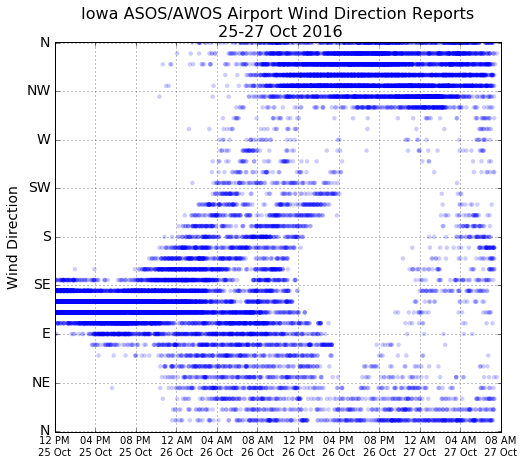

In [3]:
(fig, ax) = plt.subplots(1,1, figsize=(8,7))
ax.scatter(times, vals, edgecolor='None', alpha=0.2)
ax.set_title("Iowa ASOS/AWOS Airport Wind Direction Reports\n 25-27 Oct 2016",
            fontsize=16)
ax.set_ylabel("Wind Direction", fontsize=14)
ax.set_yticks([0, 45, 90, 135, 180, 225, 270, 315, 360])
ax.set_yticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW', 'N'], fontsize=14)
ax.set_ylim(-1, 361)
ax.grid(True)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%I %p\n%-d %b', 
                                                  tz=pytz.timezone("America/Chicago")))
ax.set_xlim(datetime.datetime(2016, 10, 25, 17),
            datetime.datetime(2016, 10, 27, 13))
#ax.set_ylim(bottom=29, top=30.5)
fig.savefig('161027.png')